# Univariate Gaussian

## Packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.optimize import minimize

## Generate random variables

Generate a vector of normal random variables, shape `(n,)`

In [43]:
# set the random seed
rng = np.random.default_rng(42)
# generate a sample of normally distributed random variables with mean mu and variance var
mu = 0
var = 2
sample = rng.normal(mu, var, 1000)

print(sample.shape)

(1000,)


## Define Normal Distribution Class

The probability density function of the univariate Gaussian is given by:

$$f(x | \mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{1}{2\sigma^{2}}(x - \mu)^{2}}$$

In [44]:
class NormalDistribution:
    def __init__(self):
        self.mu_ = None
        self.var_ = None
        
    def fit(self, x):
        """
            Fit the mean and variance of the
            Gaussian model using the mean and
            variance of the provided sample, x.
        """
        self.mu_ = x.mean()
        self.var_ = x.var()
        
    def pdf(self, x):
        """
            Return a vector (shape of x) of the probabilities
            of the values of x
        """
        first_factor = 1 / (np.sqrt(2*np.pi*self.var_))
        second_factor = np.exp(-1/(2*self.var_)*(x - self.mu_)**2)
        return first_factor*second_factor

# instantiate the NormalDistribution class
ndist = NormalDistribution()
# fit the NormalDistribution model to the sample generated above
ndist.fit(sample)

## Plotting

We can plot a histogram of the sample generated by the pseudo-random number generator, and then fit a curve on top of the normal distribution using the paramters we fitted to the sample.

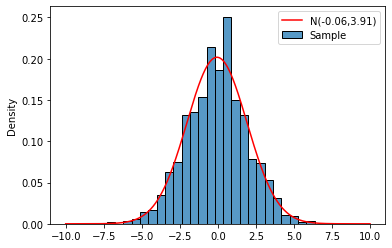

In [46]:
# generate x-axis points for plotting the pdf
xrange = np.linspace(-10, 10, 1000)
# get probability values for associated x
zrange = ndist.pdf(xrange)

# plot
sns.histplot(sample, bins=25, stat='density', label="Sample")
plt.plot(xrange, zrange, color='red', label=f"N({ndist.mu_:.2f},{ndist.var_:.2f})")
plt.legend()

## Maximum Likelihood Estimation

Here we minimise the likelihood function for the univariate Gaussian pdf. This allows us to find the best-fitting parameters.

The log-likelihood of the univariate Gaussian is given by:

$$\log \mathcal{L}(\mu, \sigma^{2}) = -\frac{n}{2} \log (2\pi) - \frac{n}{2} \log \sigma^{2} - \frac{1}{2\sigma^{2}}\sum_{i = 1}^{n} (x_{i} - \mu)^{2}$$

and hence we want to minimise

$$\hat{\mu}, \hat{\sigma} = \text{argmin}_{\mu, \sigma} -\log \mathcal{L}(\mu, \sigma^{2})$$

In [47]:
# define the univariate Gaussian likelihood
def likelihood(params, x):
    mu, sigma = params
    n = len(x)
    L = (n/2)*np.log(2*np.pi)+(n/2)*np.log(sigma**2)+(1/(2*sigma**2))*sum((x-mu)**2)
    return L

In [48]:
lik_model = minimize(likelihood, x0=[0, 0.5], args=sample)

lik_model.x

array([-0.05778303,  1.97744471])

# TO FIX

In [54]:
stats.chisquare(f_obs=sample, f_exp=zrange)

Power_divergenceResult(statistic=231468555.24327713, pvalue=0.0)

In [55]:
zrange

array([6.53984468e-07, 6.88100460e-07, 7.23921953e-07, 7.61530201e-07,
       8.01010116e-07, 8.42450428e-07, 8.85943844e-07, 9.31587215e-07,
       9.79481708e-07, 1.02973299e-06, 1.08245140e-06, 1.13775217e-06,
       1.19575560e-06, 1.25658728e-06, 1.32037830e-06, 1.38726550e-06,
       1.45739165e-06, 1.53090575e-06, 1.60796324e-06, 1.68872628e-06,
       1.77336403e-06, 1.86205289e-06, 1.95497683e-06, 2.05232768e-06,
       2.15430543e-06, 2.26111856e-06, 2.37298437e-06, 2.49012934e-06,
       2.61278949e-06, 2.74121070e-06, 2.87564918e-06, 3.01637180e-06,
       3.16365653e-06, 3.31779284e-06, 3.47908221e-06, 3.64783848e-06,
       3.82438843e-06, 4.00907219e-06, 4.20224377e-06, 4.40427159e-06,
       4.61553903e-06, 4.83644495e-06, 5.06740430e-06, 5.30884868e-06,
       5.56122701e-06, 5.82500611e-06, 6.10067138e-06, 6.38872750e-06,
       6.68969907e-06, 7.00413138e-06, 7.33259117e-06, 7.67566734e-06,
       8.03397179e-06, 8.40814022e-06, 8.79883298e-06, 9.20673595e-06,
      

In [56]:
sample

array([ 6.09434160e-01, -2.07996821e+00,  1.50090239e+00,  1.88112943e+00,
       -3.90207038e+00, -2.60435901e+00,  2.55680806e-01, -6.32485185e-01,
       -3.36023150e-02, -1.70608786e+00,  1.75879595e+00,  1.55558387e+00,
        1.32061395e-01,  2.25448241e+00,  9.35018685e-01, -1.71858493e+00,
        7.37501568e-01, -1.91776520e+00,  1.75690060e+00, -9.98518220e-02,
       -3.69724727e-01, -1.36185909e+00,  2.44508268e+00, -3.09058964e-01,
       -8.56655644e-01, -7.04267101e-01,  1.06461837e+00,  7.30888129e-01,
        8.25465223e-01,  8.61642006e-01,  4.28329520e+00, -8.12830033e-01,
       -1.02448546e+00, -1.62754546e+00,  1.23195885e+00,  2.25794459e+00,
       -2.27894915e-01, -1.68031295e+00, -1.64896243e+00,  1.30118558e+00,
        1.48650834e+00,  1.08630854e+00, -1.33101941e+00,  4.64322646e-01,
        2.33371618e-01,  4.37377193e-01,  1.74285756e+00,  4.47191098e-01,
        1.35782713e+00,  1.35158139e-01,  5.78238797e-01,  1.26257645e+00,
       -2.91431164e+00, -